In [23]:
from simulation import *
from aesthetics import *
from models import *
from data import *
from analysis import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

# Do any angles have directional flux that is the same sign on both surfaces?

In [90]:
calculation = True
adk_dir = '../../md-data/adenylate-kinase/'
adk_unbound_files = sorted(glob.glob(adk_dir + 'AdKDihedHist_apo-4ake/' + '*'))
names = []
for file in range(len(adk_unbound_files)):
    name = os.path.splitext(os.path.basename(adk_unbound_files[file]))[0]
    name = re.search('^[^_]*', name).group(0)        
    if re.search('omega*', name):
        continue
    if re.search('chi3ASN*', name):
        continue
    if re.search('chi5LYS*', name):
        continue
    names.append(name)

df = pd.DataFrame()
if calculation:
    for concentration in np.arange(-6, 0, 0.1):
        for name in names:
            this = simulation(data_source = 'adk_md_data')
            this.name = name
            this.cSubstrate = 10**concentration
            this.simulate()

            a = this.flux_u > 0
            b = this.flux_b < 0
            same_sign = sum(a != b)
            if same_sign > 0:
                same_sign_index = np.where(a != b)[0][0] # First place they overlap
            else:
                same_sign_index = np.nan
            df = df.append(pd.DataFrame({'Concentration': concentration,
                                'File' : name,
                                'Sign': same_sign,
                                'Location': same_sign_index,
                                'ResID': re.match('.*?([0-9]+)$', name).group(1),
                                    }, index=[0]), ignore_index=True)


In [106]:
df[df['Sign'] != 0].head()

,Concentration,File,Location,ResID,Sign
0,-6.0,chi1ALA11,25.0,11,1
1,-6.0,chi1ALA127,16.0,127,1
3,-6.0,chi1ALA176,43.0,176,7
5,-6.0,chi1ALA188,5.0,188,15
7,-6.0,chi1ALA203,18.0,203,1


In [118]:
df[(df['File'].str.contains('chi')) & (df['Sign'] > 10)]

,Concentration,File,Location,ResID,Sign
5,-6.0,chi1ALA188,5.0,188,15
14,-6.0,chi1ALA73,6.0,73,19
26,-6.0,chi1ARG2,15.0,2,17
29,-6.0,chi1ARG71,18.0,71,19
34,-6.0,chi1ASN190,25.0,190,15
36,-6.0,chi1ASP104,1.0,104,23
37,-6.0,chi1ASP110,23.0,110,12
38,-6.0,chi1ASP113,1.0,113,11
39,-6.0,chi1ASP118,26.0,118,17
40,-6.0,chi1ASP146,5.0,146,33


C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +7.94e-01  M         
dt                        +1.00e-12  second**-1
-----------------         ---------  --------- 
Intrasurface flux         -8.75e-05  cycle second**-1
Peak intrasurface flux    +1.57e+01  cycle second**-1
Intersurface flux         -1.21e-06  cycle second**-1


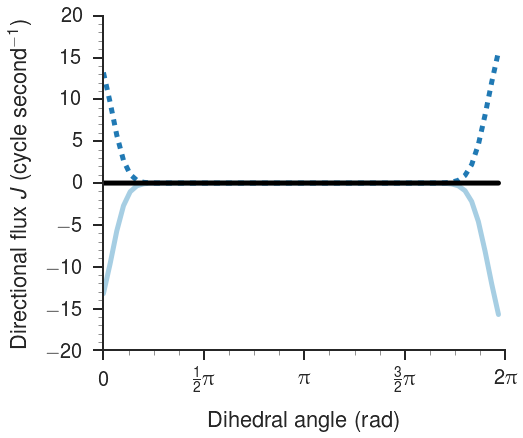

In [122]:
this = simulation(data_source = 'adk_md_data')
this.name = 'chi4GLN28'
this.cSubstrate = 10**-0.1
this.simulate()
this.plot_flux()

In [35]:
a = this.flux_u > 0
b = this.flux_b < 0

In [36]:
a

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True], dtype=bool)

In [37]:
b

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True], dtype=bool)

In [70]:
a != b

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False], dtype=bool)

In [71]:
sum(a != b)

1

In [61]:
np.where(a != b)

(array([25]),)

In [64]:
this.flux_u[25]

-0.00010973215103149414

In [65]:
this.flux_b[25]

-0.00042011542245745659

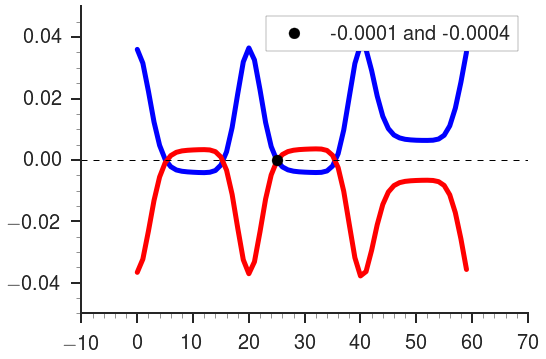

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(this.flux_u, c='b')
ax.plot(this.flux_b, c='r')
ax.axhline(y = 0, c='k', ls='--', lw=1)
ax.scatter(25, this.flux_u[25], c='k', s=120, zorder=20, label='-0.0001 and -0.0004')
ax.legend(frameon=True)
aesthetics.paper_plot(fig)

In [20]:
df.head()

,Concentration,File,ResID,Sign
0,-6.0,chi1ALA11,11,True
1,-6.0,chi1ALA127,127,True
2,-6.0,chi1ALA17,17,True
3,-6.0,chi1ALA176,176,True
4,-6.0,chi1ALA186,186,True


In [21]:
this.flux_u

NameError: name 'this' is not defined